In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.append('../scripts')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from elements import *

import measurement as me

### OMIT
    In this example we show the OMIT effect. 

### Defining the OM system

In [265]:
omega_cav = 5e9*np.pi*2
kappa_0 = 0.3e6*np.pi*2
kappa_ex = 0.4e6*np.pi*2

omega_m = 5e6*np.pi*2
gamma_m = 100*np.pi*2

g_0 = 200*np.pi*2

P_in = 8e-11
Delta = -omega_m
omega_cont = omega_cav + Delta
T_cont = 1

from DCnonlinearities import optomechanics

omdir = optomechanics(P_in, kappa_0, kappa_ex, omega_cav, omega_cont, omega_m, g_0)

g= omdir['g']
omega_cav = omdir['omega_c']


a = Mode('a', omega_cav)
b = Mode('b', omega_m)

a_cont = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_cont, bath_temp = T_cont)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=10e-3)

b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

g_ab = Coupling(a, b, g * np.array([1,0,0,0]))

sys_om = System([a, b], [a_in0, b_in0, a_cont], [g_ab])

print ('Cooperativity C: ',g**2/kappa/gamma_m)

### Measurments

Text(0,0.5,'$|S_{aa}|/\\hbar \\omega$ [Hz$^{-1}$]')

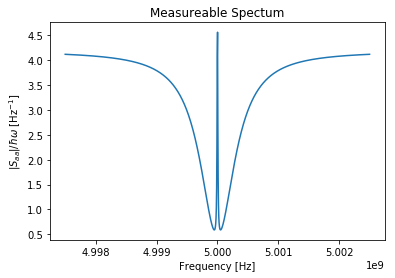

In [340]:
a_outex = Output(sys_om, a_cont)

omegas = np.linspace(omega_cav - 0.5 * omega_m, omega_cav + 0.5 * omega_m, 1000)

spec = me.spectrum(omegas,me.PowerMeasurement(a_outex), components=True)

plt.plot(omegas/2/np.pi, np.abs(spec[:,-1]),label = 'Measureable Spectum')
plt.title('Measureable Spectum')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$|S_{aa}|/\hbar \omega$ [Hz$^{-1}$]')


### Plotting the S Matrix first diagonal element

Text(0,0.5,'$Imag\\{S_{11}\\}/\\hbar \\omega$ [Hz$^{-1}$]')

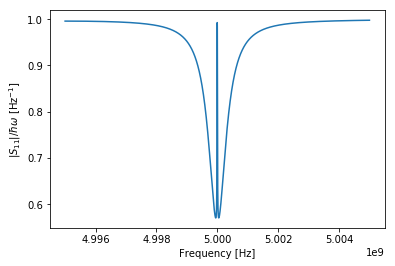

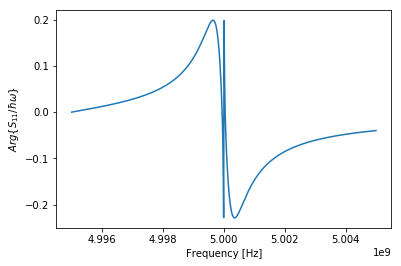

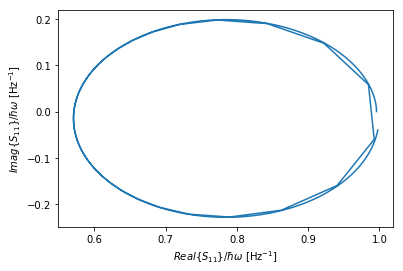

In [344]:
omegas = np.linspace(0, 2 * omega_m, 5000)
S = sys_om.SMatrix(omegas)
I = 0
plt.plot((omega_cont + omegas)/2/np.pi, np.real(S[:,I,I]))
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$|S_{11}|/\hbar \omega$ [Hz$^{-1}$]')

plt.figure()
plt.plot((omega_cont + omegas)/2/np.pi, np.imag(S[:,I,I]))
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$Arg\{S_{11}/\hbar \omega\}$')

plt.figure()
plt.plot(np.real(S[:,I,I]), np.imag(S[:,I,I]))
plt.xlabel(r'$Real\{S_{11}\}/\hbar \omega$ [Hz$^{-1}$]')
plt.ylabel(r'$Imag\{S_{11}\}/\hbar \omega$ [Hz$^{-1}$]')